In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10

#Import Statements for the Architecture.

from keras.layers import Input,Conv2D,Dense,MaxPooling2D,UpSampling2D,BatchNormalization,Dropout,Conv2DTranspose, Activation,Concatenate
from keras.models import Model,Sequential

from keras.callbacks import ModelCheckpoint,Callback,LearningRateScheduler
from keras import regularizers

1. Implement Auto Encoder architecture of CIFAR 10 dataset

In [2]:
(X_train,_),(X_test,_) = cifar10.load_data()

In [3]:
# Normalizing the data and reshaping it.
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test),X_test.shape[1],X_test.shape[2],3)
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
def create_autoencoder(num_kernals,input_img):

    # Encoder
    x = Conv2D(num_kernals[0], (3, 3), activation = 'relu', padding = 'same')(input_img)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = MaxPooling2D(pool_size = (2, 2),padding='same')(x)

    x = Conv2D(num_kernals[1], (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    x = MaxPooling2D(pool_size = (2, 2),padding='same')(x)

    x = Conv2D(num_kernals[2], (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    encoded = MaxPooling2D(pool_size = (2, 2),padding='same',name='encoder')(x)

    # Decoder
    x = Conv2D(num_kernals[2], (3, 3), activation = 'relu', padding = 'same')(encoded)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = UpSampling2D(size = (2, 2))(x)

    x = Conv2D(num_kernals[1], (3, 3), activation = 'relu', padding = 'same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    x = UpSampling2D(size = (2, 2))(x)

    x = Conv2D(num_kernals[0], (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = UpSampling2D(size = (2, 2))(x)

    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return autoencoder

In [5]:
def scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        return lr * 0.9
    else:
        return lr

lr_schedule = LearningRateScheduler(scheduler)

In [6]:
autoencoder1 = create_autoencoder([16,8,8],Input(shape=(32, 32, 3)))

In [7]:
autoencoder1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160  

In [8]:
autoencoder1.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test,X_test),callbacks=[lr_schedule])

Epoch 1/50
196/196 [==============================] - 18s 27ms/step - loss: 0.6635 - accuracy: 0.3696 - val_loss: 0.6395 - val_accuracy: 0.4786 - lr: 0.0010
Epoch 2/50
196/196 [==============================] - 4s 19ms/step - loss: 0.6186 - accuracy: 0.4006 - val_loss: 0.6209 - val_accuracy: 0.4733 - lr: 0.0010
Epoch 3/50
196/196 [==============================] - 4s 20ms/step - loss: 0.6101 - accuracy: 0.4160 - val_loss: 0.6140 - val_accuracy: 0.4681 - lr: 0.0010
Epoch 4/50
196/196 [==============================] - 4s 19ms/step - loss: 0.6056 - accuracy: 0.4315 - val_loss: 0.6102 - val_accuracy: 0.4719 - lr: 0.0010
Epoch 5/50
196/196 [==============================] - 4s 18ms/step - loss: 0.6026 - accuracy: 0.4796 - val_loss: 0.6087 - val_accuracy: 0.5276 - lr: 0.0010
Epoch 6/50
196/196 [==============================] - 4s 20ms/step - loss: 0.5998 - accuracy: 0.5324 - val_loss: 0.6139 - val_accuracy: 0.5492 - lr: 0.0010
Epoch 7/50
196/196 [==============================] - 4s 19ms/s

In [9]:
predicted = autoencoder1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


2. Repeat the same architecture in Q1 by replacing the filter (number of kernels in convolution
layer) combination to (64,32,16) for encoder part and (16,32,64) for decoder.

In [10]:
autoencoder2 = create_autoencoder([64,32,16],Input(shape=(32, 32, 3)))

In [11]:
autoencoder2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        1846

In [12]:
autoencoder2.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test,X_test),callbacks=[lr_schedule])

Epoch 1/50
196/196 [==============================] - 16s 51ms/step - loss: 0.6339 - accuracy: 0.4802 - val_loss: 0.6672 - val_accuracy: 0.4939 - lr: 0.0010
Epoch 2/50
196/196 [==============================] - 9s 43ms/step - loss: 0.5969 - accuracy: 0.5708 - val_loss: 0.6257 - val_accuracy: 0.4671 - lr: 0.0010
Epoch 3/50
196/196 [==============================] - 8s 43ms/step - loss: 0.5907 - accuracy: 0.5965 - val_loss: 0.6089 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 4/50
196/196 [==============================] - 8s 42ms/step - loss: 0.5879 - accuracy: 0.6101 - val_loss: 0.6035 - val_accuracy: 0.6105 - lr: 0.0010
Epoch 5/50
196/196 [==============================] - 8s 43ms/step - loss: 0.5859 - accuracy: 0.6327 - val_loss: 0.5934 - val_accuracy: 0.6461 - lr: 0.0010
Epoch 6/50
196/196 [==============================] - 8s 42ms/step - loss: 0.5845 - accuracy: 0.6511 - val_loss: 0.5937 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 7/50
196/196 [==============================] - 8s 43ms/s

In [13]:
predicted2 = autoencoder2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


3. Repeat the same architecture in Q1 by replacing the filter combination to (YOUR CHOICE) for
encoder part and (YOUR CHOICE) for decoder.

In [14]:
autoencoder3 = create_autoencoder([32,64,128],Input(shape=(32, 32, 3)))

In [15]:
autoencoder3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        1849

In [16]:
autoencoder3.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test,X_test),callbacks=[lr_schedule])

Epoch 1/50
196/196 [==============================] - 14s 45ms/step - loss: 0.6089 - accuracy: 0.5287 - val_loss: 0.6484 - val_accuracy: 0.5118 - lr: 0.0010
Epoch 2/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5824 - accuracy: 0.6430 - val_loss: 0.6010 - val_accuracy: 0.6659 - lr: 0.0010
Epoch 3/50
196/196 [==============================] - 8s 39ms/step - loss: 0.5786 - accuracy: 0.6750 - val_loss: 0.5830 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 4/50
196/196 [==============================] - 7s 38ms/step - loss: 0.5756 - accuracy: 0.6938 - val_loss: 0.5811 - val_accuracy: 0.7423 - lr: 0.0010
Epoch 5/50
196/196 [==============================] - 8s 40ms/step - loss: 0.5741 - accuracy: 0.6999 - val_loss: 0.5753 - val_accuracy: 0.7558 - lr: 0.0010
Epoch 6/50
196/196 [==============================] - 8s 39ms/step - loss: 0.5726 - accuracy: 0.7095 - val_loss: 0.5782 - val_accuracy: 0.7615 - lr: 0.0010
Epoch 7/50
196/196 [==============================] - 7s 38ms/s

In [17]:
predicted3 = autoencoder3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


4. Compare the results of Q1, Q2, and Q3. Additionally, provide your thoughts which architecture is best autoencoder.  
I have Interpreted the architecture from the given Link.I made few changes in the autoencoder architecture to improve the models accuracy.Tried the bottleneck approach too.
But i have encountered with lower accuracy in both training and validation accuracy so i reverted the architecture where i got the highest accuracy.In the First architecture the base one the number of neurons are less which interm had the effect of lower accuracy as the parameters are less in the architecture which has the less filter size.In the Later architecture the neurons are increased where the accuracy is improved by 10%.
I have refered many of the architectures where i have seen an architecture which will have the high accuracy with the filters(number of neurons) increasing till the bottle neck(for encoding) and then decreasing the filters(for decoder).
Final Accuracy i achieved is 75%. We can see the plotting of the images after construction also.




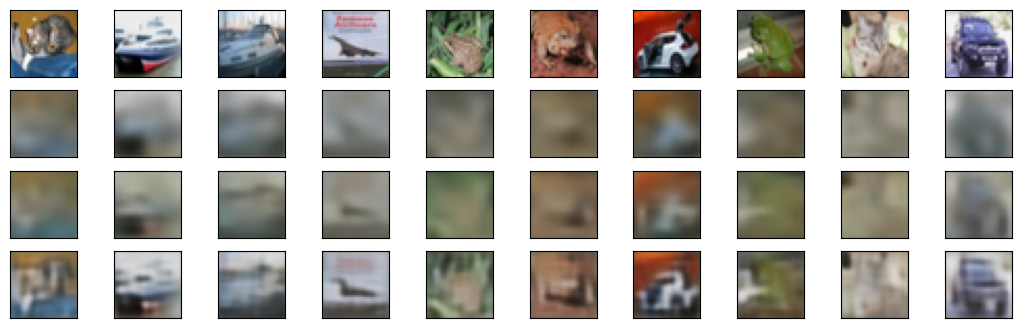

In [18]:
plt.figure(figsize=(40, 4))

# Display original and reconstructed images for three sets
for i in range(10):
    # Display original images
    ax = plt.subplot(4, 30, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images for the first set (predicted)
    ax = plt.subplot(4, 30, 30 + i + 1)
    plt.imshow(predicted[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images for the second set (predicted2)
    ax = plt.subplot(4, 30, 2 * 30 + i + 1)
    plt.imshow(predicted2[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images for the third set (predicted3)
    ax = plt.subplot(4, 30, 3 * 30 + i + 1)
    plt.imshow(predicted3[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


5. Implement Denoising Auto Encoder architecture on CIFAR 10 dataset #Prepare input data by adding noise to CIFAR10 dataset

In [20]:
def add_noise_and_clip_data(data):
  noise = np.random.normal(loc = 0.0,scale=0.3,size=data.shape)
  data = data + noise*0.3
  data = np.clip(data,0.,1.)
  return data

6. Change the noise parameters in ‘add_noise_and_clip_data’ function to YOUR CHOICE and
rerun the Q5

In [31]:
def add_noise_and_clip_data_1(data):
  noise = np.random.normal(loc = 0.0,scale=0.3,size=data.shape)
  data = data + noise
  data = np.clip(data,0.,1.)
  return data

In [21]:
X_train_noisy = add_noise_and_clip_data(X_train)
X_test_noisy = add_noise_and_clip_data(X_test)

In [32]:
X_train_noisy_1 = add_noise_and_clip_data_1(X_train)
X_test_noisy_1 = add_noise_and_clip_data_1(X_test)

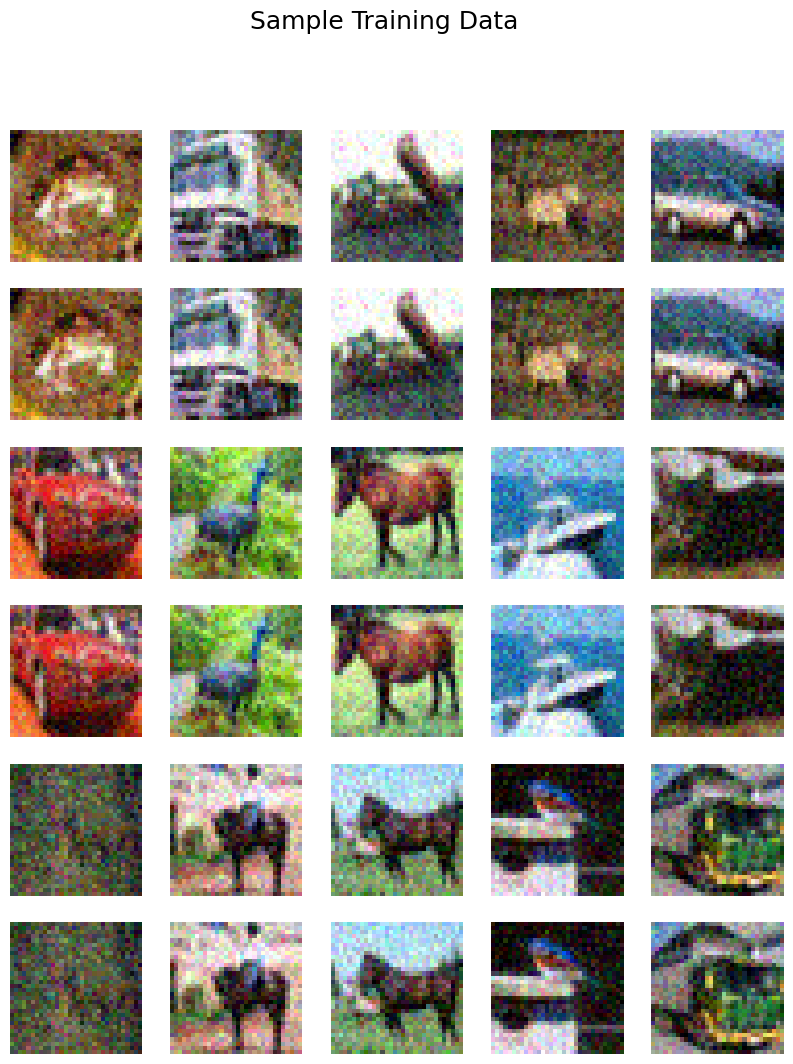

In [22]:
#Visualise Noisy images

rows = 3   # defining no of rows in figure
cols = 5   # defining no of columns in figure

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
  for j in range(cols):
    f.add_subplot(rows*2,cols,(2*i*cols)+(j+1)) #adding subplot to figure on each iteration
    plt.imshow(X_train_noisy[i*cols+j])
    plt.axis("off")

  for j in range(cols):
    f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) #adding subplot to figure on each iteration
    plt.imshow(X_train_noisy[i*cols+j])
    plt.axis("off")

f.suptitle("Sample Training Data", fontsize = 18)
plt.savefig("Cifar-trian.png")

plt.show()

In [23]:
#Build a CNN Autoencoder Network.

def conv_block(x, filters, kernel_size, strides = 2):
  x = Conv2D(filters=filters,
             kernel_size=kernel_size,
             strides=strides,
             padding='same',
             activation='relu',
             kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  return x

def deconv_block(x,filters,kernel_size):
  x = Conv2DTranspose(filters=filters,
                      kernel_size=kernel_size,
                      strides = 2,
                      padding='same',
                      activation='relu',
                      kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  return x

In [24]:
def auto_encoder():
  inputs = Input(shape = (32,32,3),name = 'inputs')
  conv_block1 = conv_block(inputs,32,3)
  conv_block2 = conv_block(conv_block1,64,3)
  conv_block3 = conv_block(conv_block2,128,3)
  conv_block4 = conv_block(conv_block3,256,3)
  conv_block5 = conv_block(conv_block4,256,3)
  conv_block6 = conv_block(conv_block5,512,3,1)

  deconv_block1 = deconv_block(conv_block6,512,3)
  merge1 = Concatenate()([deconv_block1,conv_block4])
  deconv_block2 = deconv_block(merge1,256,3)
  merge2 = Concatenate()([deconv_block2,conv_block3])
  deconv_block3 = deconv_block(merge2,128,3)
  merge3 = Concatenate()([deconv_block3,conv_block2])
  deconv_block4 = deconv_block(merge3,64,3)
  merge4 = Concatenate()([deconv_block4,conv_block1])
  deconv_block5 = deconv_block(merge4,32,3)

  final_deconv = Conv2DTranspose(filters=3,kernel_size=3,padding='same')(deconv_block5)
  outputs = Activation('sigmoid', name = 'output')(final_deconv)
  return Model(inputs, outputs, name = 'autoencoder')

In [25]:
model = auto_encoder()

def scheduler_1(epoch):
  if epoch<10:
    return 0.0001
  else:
    return 0.0001 * tf.math.exp(0.1*(10-epoch))

class myCallback(Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.80):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

lr = LearningRateScheduler(scheduler_1)
checkpoint = ModelCheckpoint('best_model.h5', verbose = 1, save_best_only = True, save_weights_only = True)

model.compile(optimizer = "adam", loss = 'mse', metrics=["accuracy"])
model.summary()

Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_21 (Conv2D)          (None, 16, 16, 32)           896       ['inputs[0][0]']              
                                                                                                  
 batch_normalization_18 (Ba  (None, 16, 16, 32)           128       ['conv2d_21[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_22 (Conv2D)          (None, 8, 8, 64)             18496     ['batch_normalizatio

In [26]:
#Training
history = model.fit(X_train_noisy,
                    X_train,
                    validation_data=(X_test_noisy,X_test),
                    epochs=25,
                    batch_size=128,
                    shuffle=True,
                    callbacks=[checkpoint,callbacks,lr])

Epoch 1/25
391/391 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.5271
Epoch 1: val_loss improved from inf to 0.10783, saving model to best_model.h5
391/391 [==============================] - 34s 56ms/step - loss: 0.6289 - accuracy: 0.5271 - val_loss: 0.1078 - val_accuracy: 0.5684 - lr: 1.0000e-04
Epoch 2/25
391/391 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.6822
Epoch 2: val_loss improved from 0.10783 to 0.02132, saving model to best_model.h5
391/391 [==============================] - 17s 45ms/step - loss: 0.0433 - accuracy: 0.6822 - val_loss: 0.0213 - val_accuracy: 0.7013 - lr: 1.0000e-04
Epoch 3/25
391/391 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.7372
Epoch 3: val_loss improved from 0.02132 to 0.01078, saving model to best_model.h5
391/391 [==============================] - 19s 48ms/step - loss: 0.0131 - accuracy: 0.7372 - val_loss: 0.0108 - val_accuracy: 0.7518 - lr: 1.0000e-04
Epoch 4/25
391/391 [

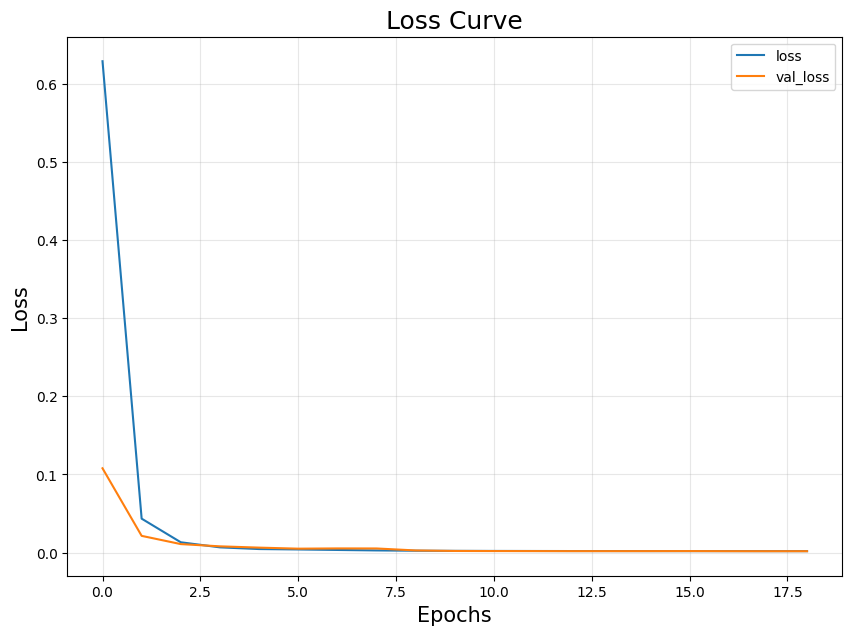

In [27]:
# Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve_cifar10.png")
plt.show()

In [28]:
# Select few random test images
num_imgs = 48
rand = np.random.randint(1, X_test_noisy.shape[0]-48)

cifar_test_images = X_test_noisy[rand:rand+num_imgs] # slicing
cifar_test_predicted = model.predict(cifar_test_images) # predict

2/2 [==============================] - 1s 8ms/step


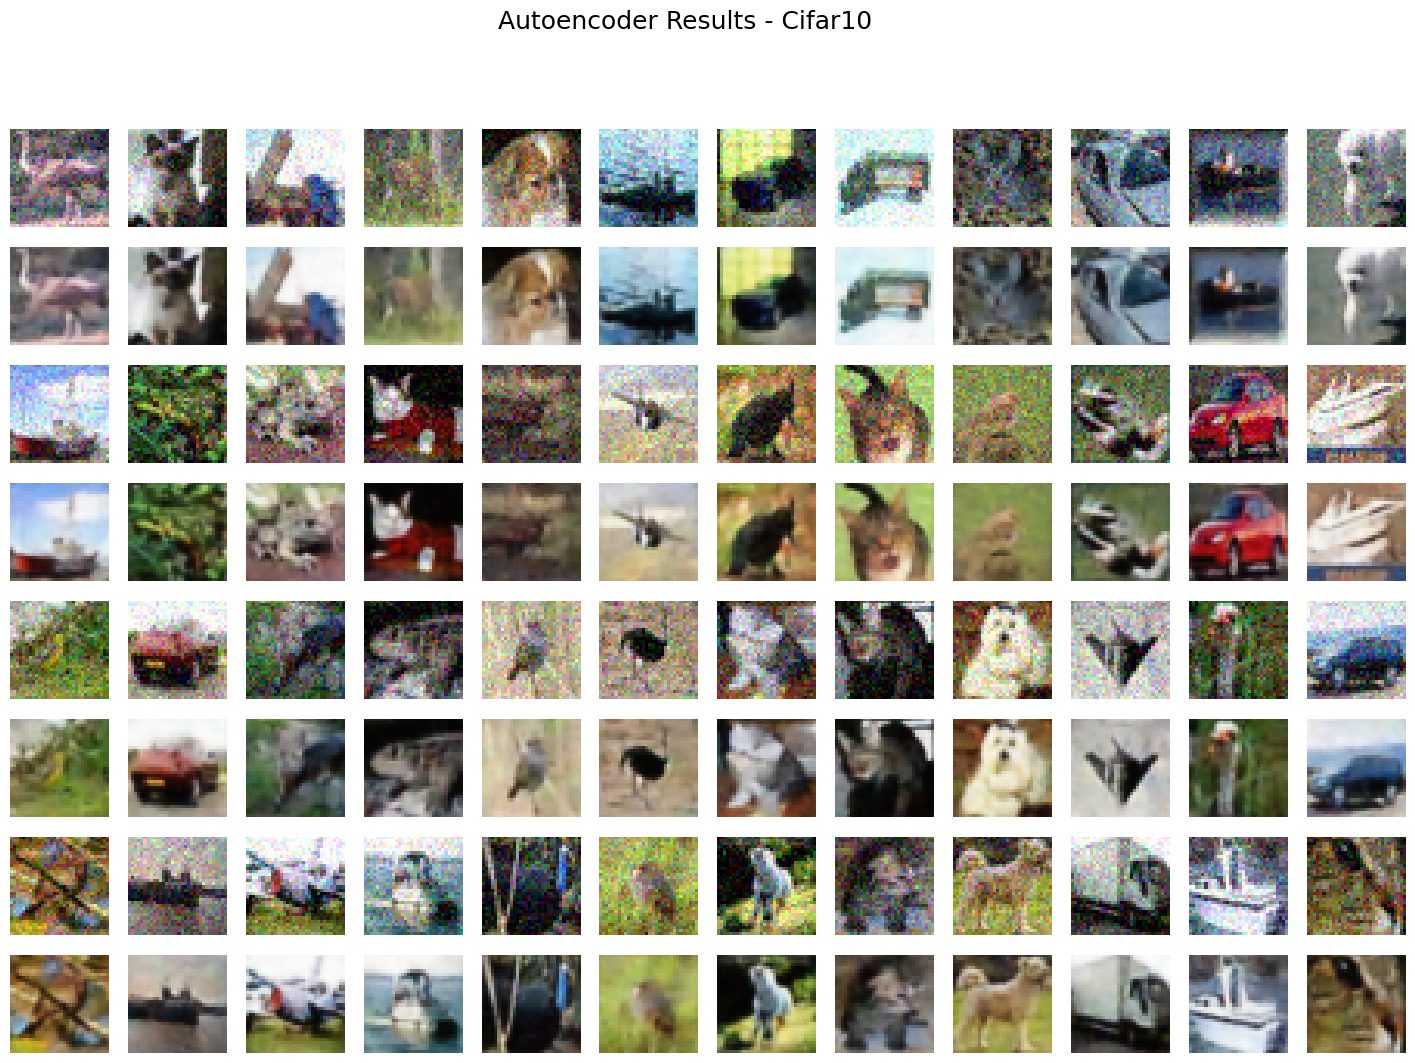

In [29]:
rows = 4 # defining no. of rows in figure
cols = 12 # defining no. of colums in figure
cell_size = 1.5
f = plt.figure(figsize=(cell_size*cols,cell_size*rows*2)) # defining a figure
f.tight_layout()
for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows * 2, cols, (2 * i * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_images[i * cols + j])
        plt.axis("off")

    for j in range(cols):
        f.add_subplot(rows * 2, cols, ((2 * i+ 1) * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_predicted[i * cols + j])
        plt.axis("off")

f.suptitle("Autoencoder Results - Cifar10",fontsize=18)
plt.savefig("test_results_cifar10.png")

plt.show()

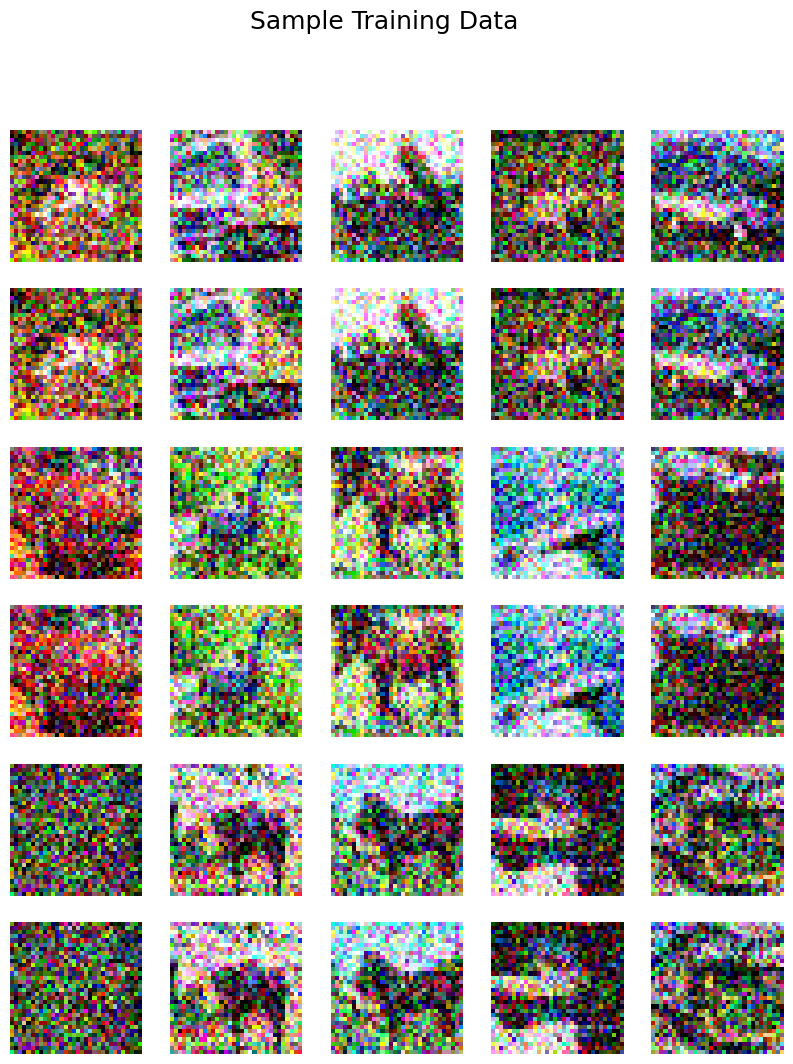

In [33]:
#Visualise Noisy images

rows = 3   # defining no of rows in figure
cols = 5   # defining no of columns in figure

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
  for j in range(cols):
    f.add_subplot(rows*2,cols,(2*i*cols)+(j+1)) #adding subplot to figure on each iteration
    plt.imshow(X_train_noisy_1[i*cols+j])
    plt.axis("off")

  for j in range(cols):
    f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) #adding subplot to figure on each iteration
    plt.imshow(X_train_noisy_1[i*cols+j])
    plt.axis("off")

f.suptitle("Sample Training Data", fontsize = 18)
plt.savefig("Cifar-trian.png")

plt.show()

In [34]:
model_1 = auto_encoder()

model_1.compile(optimizer = "adam", loss = 'mse', metrics=["accuracy"])
model_1.summary()

Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 16, 16, 32)           896       ['inputs[0][0]']              
                                                                                                  
 batch_normalization_29 (Ba  (None, 16, 16, 32)           128       ['conv2d_27[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_28 (Conv2D)          (None, 8, 8, 64)             18496     ['batch_normalizatio

In [36]:
#Training
history_1 = model.fit(X_train_noisy_1,
                    X_train,
                    validation_data=(X_test_noisy,X_test),
                    epochs=25,
                    batch_size=128,
                    shuffle=True,
                    callbacks=[checkpoint,callbacks,lr])

Epoch 1/25
390/391 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.7026
Epoch 1: val_loss did not improve from 0.00166
391/391 [==============================] - 19s 48ms/step - loss: 0.0062 - accuracy: 0.7025 - val_loss: 0.0050 - val_accuracy: 0.7645 - lr: 1.0000e-04
Epoch 2/25
390/391 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.7036
Epoch 2: val_loss did not improve from 0.00166
391/391 [==============================] - 17s 45ms/step - loss: 0.0061 - accuracy: 0.7036 - val_loss: 0.0047 - val_accuracy: 0.7718 - lr: 1.0000e-04
Epoch 3/25
390/391 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.7037
Epoch 3: val_loss did not improve from 0.00166
391/391 [==============================] - 20s 52ms/step - loss: 0.0061 - accuracy: 0.7037 - val_loss: 0.0047 - val_accuracy: 0.7684 - lr: 1.0000e-04
Epoch 4/25
391/391 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.7047
Epoch 4: val_loss did not

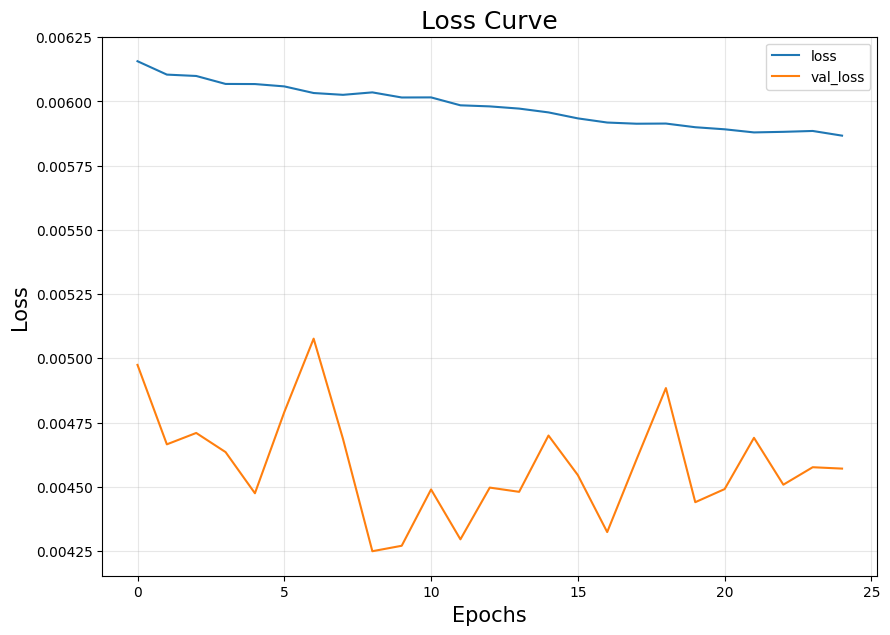

In [37]:
# Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history_1.epoch, history_1.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history_1.epoch, history_1.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve_cifar10.png")
plt.show()

In [38]:
# Select few random test images
num_imgs = 48
rand = np.random.randint(1, X_test_noisy_1.shape[0]-48)

cifar_test_images = X_test_noisy_1[rand:rand+num_imgs] # slicing
cifar_test_predicted = model_1.predict(cifar_test_images) # predict

2/2 [==============================] - 0s 12ms/step


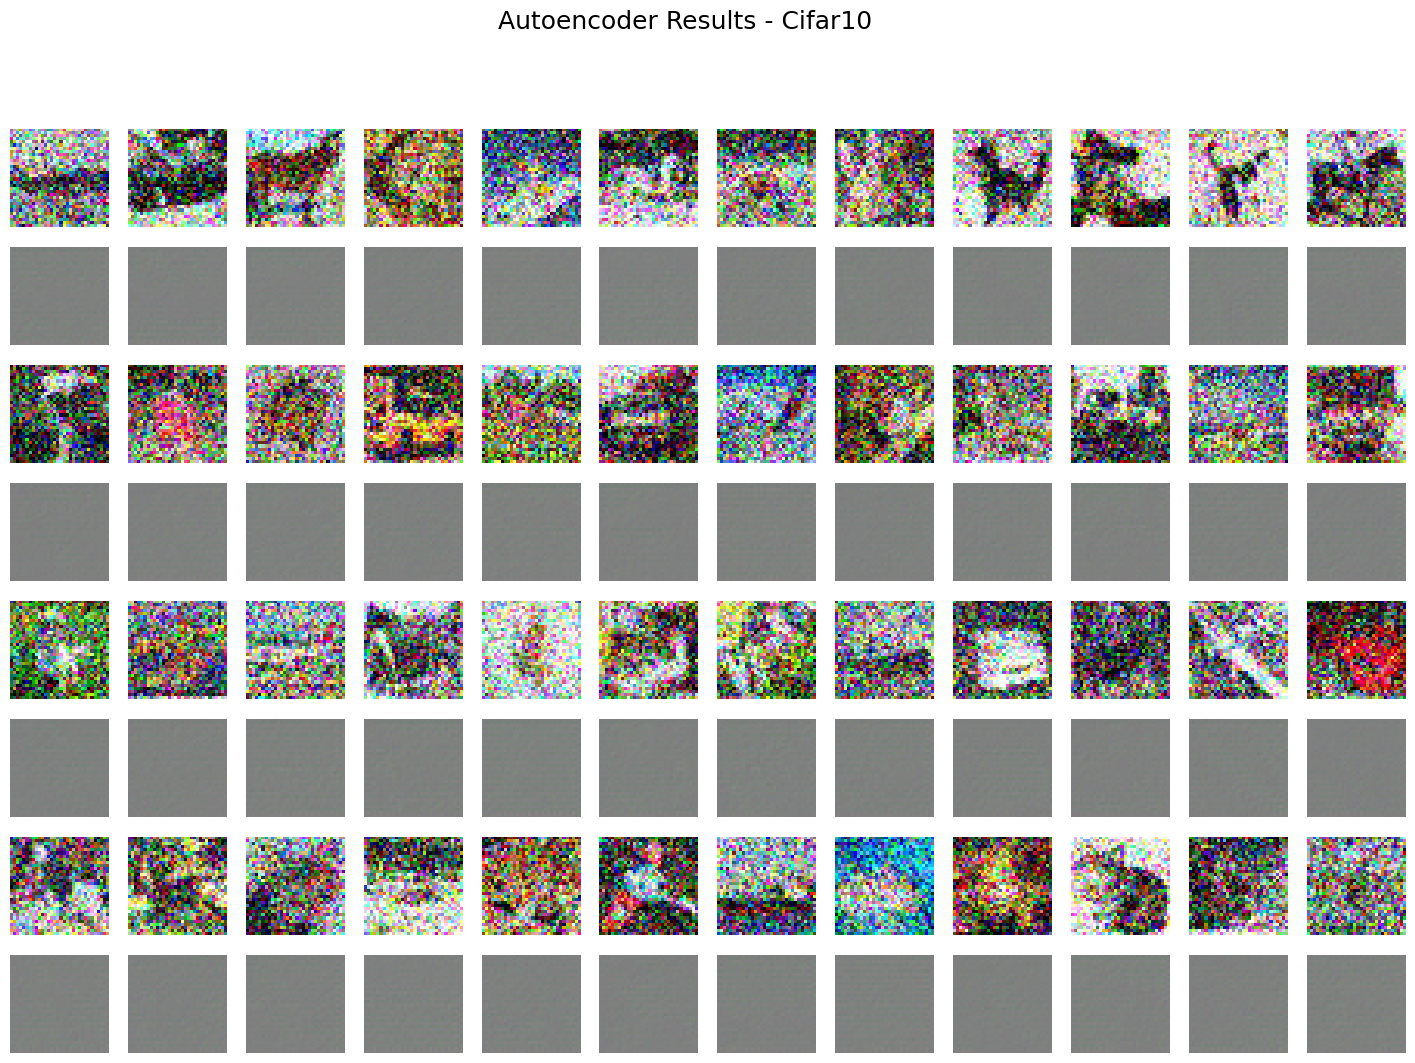

In [39]:
rows = 4 # defining no. of rows in figure
cols = 12 # defining no. of colums in figure
cell_size = 1.5
f = plt.figure(figsize=(cell_size*cols,cell_size*rows*2)) # defining a figure
f.tight_layout()
for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows * 2, cols, (2 * i * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_images[i * cols + j])
        plt.axis("off")

    for j in range(cols):
        f.add_subplot(rows * 2, cols, ((2 * i+ 1) * cols) + (j + 1)) # adding sub plot to figure on each iteration
        plt.imshow(cifar_test_predicted[i * cols + j])
        plt.axis("off")

f.suptitle("Autoencoder Results - Cifar10",fontsize=18)
plt.savefig("test_results_cifar10.png")

plt.show()

If are going to introduce some noise then i have seen the improved performce which has the more loss and if the noise is increased at the larger level then the input image is effected which intern have the large noise and less accuracy.